In [77]:
import pandas as pd
import requests
from spotify_config import spotify_headers
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline
import seaborn as sns

sns.set()
offline.init_notebook_mode(connected=True)

In [78]:
df = pd.read_csv("top_100_hip_hop_.csv")

In [79]:
df.head()

,year,artist,song,track_id,rank,acousticness,analysis_url,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,2010,Alicia Keys,Un-Thinkable (I'm Ready),4JOP8ELK6AaeySe7sKe996,1,0.73200,https://api.spotify.com/v1/audio-analysis/4JOP...,0.595,249240.0,0.507,...,0.106,-7.892,1.0,0.0618,86.099,4.0,https://api.spotify.com/v1/tracks/4JOP8ELK6Aae...,audio_features,spotify:track:4JOP8ELK6AaeySe7sKe996,0.337
1,2010,Usher,There Goes My Baby,6IUiqtI8tE49sqGbmtrNd8,2,0.17500,https://api.spotify.com/v1/audio-analysis/6IUi...,0.626,281293.0,0.520,...,0.130,-8.077,0.0,0.0892,77.468,4.0,https://api.spotify.com/v1/tracks/6IUiqtI8tE49...,audio_features,spotify:track:6IUiqtI8tE49sqGbmtrNd8,0.257
2,2010,Melanie Fiona,It Kills Me,6qU37BgVfPhpb2rhYzZWrF,3,0.21500,https://api.spotify.com/v1/audio-analysis/6qU3...,0.620,250413.0,0.789,...,0.100,-4.265,1.0,0.0469,107.359,4.0,https://api.spotify.com/v1/tracks/6qU37BgVfPhp...,audio_features,spotify:track:6qU37BgVfPhpb2rhYzZWrF,0.444
3,2010,Monica,Everything To Me,4ZOkuIDN8wRczzu1XUYC4y,4,0.47900,https://api.spotify.com/v1/audio-analysis/4ZOk...,0.308,196960.0,0.529,...,0.441,-5.319,0.0,0.0874,80.794,4.0,https://api.spotify.com/v1/tracks/4ZOkuIDN8wRc...,audio_features,spotify:track:4ZOkuIDN8wRczzu1XUYC4y,0.485
4,2010,Trey Songz Featuring Fabolous,Say Aah,2fQ6sBFWaLv2Gxos4igHLy,5,0.00453,https://api.spotify.com/v1/audio-analysis/2fQ6...,0.724,207547.0,0.870,...,0.833,-3.614,0.0,0.1130,93.010,4.0,https://api.spotify.com/v1/tracks/2fQ6sBFWaLv2...,audio_features,spotify:track:2fQ6sBFWaLv2Gxos4igHLy,0.810


In [80]:
rank=[]

# Create ranks for each artist.
for year in sorted(list(set(df['year']))):
    rank+=[i+1 for i in range(len(df[df['year']==year]))]
print(rank)

df['rank'] = rank

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79

In [81]:
# sns.scatterplot(x=df['danceability'],y=df['energy'],hue=df['year'])

C:\Users\Rafael\Anaconda3\envs\PythonData\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



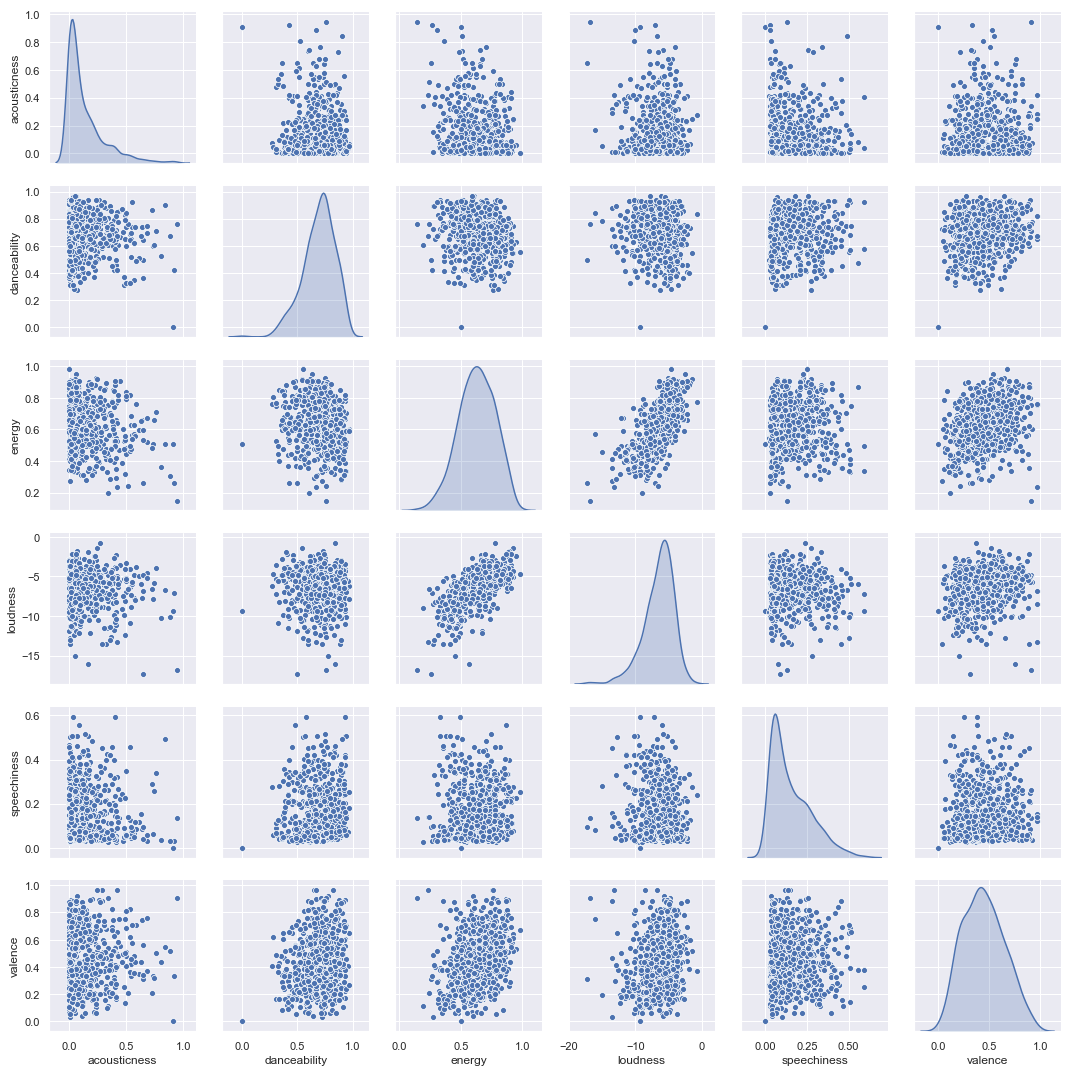

In [19]:
cols = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'valence']
# sns.scatterplot(x=merged['danceability'],y=merged['energy'],hue=merged['year'])
sns.pairplot(data=df[cols].dropna(), diag_kind='kde').savefig("output.png")


In [7]:
data = []
# artist="Drake"
year = 2010

new_df = df

trace = go.Scatter3d(
    x=new_df['danceability'],
    y=new_df['energy'],
    z=new_df['loudness'],
    mode='markers',
    marker=dict(
        size=4,
        color="teal",
        line=dict(
            width=0.1),
        opacity=.8
    ),
    name=year,
    text=[f'Title: {song}<br>Artist: {artist}' for song,artist in zip(new_df['song'],new_df['artist'])]

)
data.append(trace)
# year+=1

layout = go.Layout(
    title="Top of the Decade, by Audio Features",
    scene = dict(
        annotations=[
            dict(
                x = 0.932,
                y = 0.819,
                z = -3.484,
                ax = 0,
                ay =-150,
                text = "WTF by Missy Elliot/Pharrell<br>comes in as what<br>we consider a <br>club banger.",
                arrowhead = 1,
                xanchor = "auto",
                yanchor = "top"),
            dict(
                x=0.492,
                y=0.26,
                z=-17.341,
                ax = 50,
                ay = 0,
                text = "Marvin's Room by Drake<br>comes in as the quietest,<br>least danceable.",
                arrowhead = 1,
                xanchor = "left",
                yanchor = "bottom")
        ],
    aspectratio = dict(
      x = 1,
      y = 1,
      z = 1
    ),
    camera = dict(
      center = dict(
        x = 0,
        y = 0,
        z = 0
      ),
      eye = dict(
        x = 1.96903462608,
        y = -1.09022831971,
        z = 0.405345349304
      ),
      up = dict(
        x = 0,
        y = 0,
        z = 1
      )
    ),
    dragmode = "turntable",
    xaxis = dict(
      title = "Danceability"
    ),
    yaxis = dict(
      title = "Energy"
    ),
    zaxis = dict(
      title = "Loudness"
    ),
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=30
    )
)


fig = go.Figure(data=data, layout=layout)

# offline.plot(fig, include_plotlyjs=False, output_type='div')
# offline.iplot(fig)

In [82]:
df.loc[df['song']=="Marvins Room"]

,year,artist,song,track_id,rank,acousticness,analysis_url,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
129,2011,Drake,Marvins Room,047fCsbO4NdmwCBn8pcUXl,35,0.646,https://api.spotify.com/v1/audio-analysis/047f...,0.492,347227.0,0.26,...,0.0705,-17.341,0.0,0.0921,111.519,5.0,https://api.spotify.com/v1/tracks/047fCsbO4Ndm...,audio_features,spotify:track:047fCsbO4NdmwCBn8pcUXl,0.312


In [83]:
def top_10_rappers():
    top_10 = pd.DataFrame(df['artist'].value_counts()[:10])

    trace = go.Bar(
    x=top_10['artist'][::-1],
    y=top_10.index[::-1],
    orientation='h',
    marker=dict(
        color=top_10['artist'][::-1],
        colorscale='Greens',
        reversescale=True,
        line=dict(
            width=1.5
        )
    ),

    )

    fig = go.Figure(data=[trace])
    
    return offline.plot(fig, include_plotlyjs=False, output_type='div')

In [84]:
top_10_rappers()

'<div><div id="32f66546-40af-44b5-bfb4-e12486a6dad6" style="height: 100%; width: 100%;" class="plotly-graph-div"></div><script type="text/javascript">window.PLOTLYENV=window.PLOTLYENV || {};window.PLOTLYENV.BASE_URL="https://plot.ly";Plotly.newPlot("32f66546-40af-44b5-bfb4-e12486a6dad6", [{"marker": {"color": [6, 7, 7, 7, 8, 8, 9, 10, 10, 23], "colorscale": "Greens", "line": {"width": 1.5}, "reversescale": true}, "orientation": "h", "x": [6, 7, 7, 7, 8, 8, 9, 10, 10, 23], "y": ["Kendrick Lamar", "Nicki Minaj", "Future", "Kanye West", "Rihanna", "Trey Songz", "Chris Brown", "The Weeknd", "Beyonce", "Drake"], "type": "bar", "uid": "80c2e938-8012-44c5-9ba4-86571946d569"}], {}, {"showLink": false, "linkText": "Export to plot.ly", "plotlyServerURL": "https://plot.ly"})</script><script type="text/javascript">window.addEventListener("resize", function(){Plotly.Plots.resize(document.getElementById("32f66546-40af-44b5-bfb4-e12486a6dad6"));});</script></div>'

In [85]:
def grouped_artists():   
    top_10 = pd.DataFrame(df['artist'].value_counts()[:10])
    top_artists = list(top_10.index)

    # get all top 10 artist's songs:
    all_by_top = df.loc[df['artist'].isin(top_artists)]

    grouped = pd.DataFrame(all_by_top.groupby(['artist','year'])['rank'].count())
    grouped['rank'] = round(grouped['rank'],2)

    new_df = grouped.unstack()

    dic = new_df.fillna(0).to_dict()

    return dic,top_artists

def make_string(artist,year):
    x = list(df[(df['artist']==artist)&(df['year']==year)]['song'])
    y = list(df[(df['artist']==artist)&(df['year']==year)]['rank'])
    
    if x:
        s = 'Songs: ' 

        for song,rank in zip(x,y):
            s+= f'''<br>{song} #{rank}'''
    else:
        return ''
        
    return s

def make_conditions(col_list):
    
    ''' Returns an array with lists of conditions for dropdown menus.'''
    
    # Make array full of False values with dimensions of input list.
    array = np.full(shape=(len(col_list),len(col_list)), fill_value=False, dtype=bool)
    
    for i in range(len(array)):
        array[i][i] = True
    
    return array


In [86]:
# df loc by artist
# loop through years where they have a rank
# append those as traces to a time series
def make_top_rapper_chart():
    data = []
    buttons=[]


    dic,top_artists = grouped_artists()

    years = [k[1] for k in dic.keys()]
    conditions = make_conditions(top_artists)

    for artist in top_artists:
        num_hits = [v[artist] for v in dic.values()]

        trace = go.Bar(
            x=years,
            y=num_hits,
#             mode='lines',
            name=artist,
            text = [make_string(artist,year) for year in years]
            )
        data.append(trace)


    for artist,condition in zip(top_artists,conditions):
        dic = {'label':artist,
            'method':'update',
            'args':[{'visible': condition}]}

        buttons.append(dic)


    updatemenus = list([
        dict(
            buttons=buttons,
            x = 1.2,
            xanchor = 'right',
            y = 1,
            yanchor = 'top',
            pad = {'l': 0, 't': 0.0},
            bgcolor = '#AAAAAA',
            showactive = False,
            bordercolor = '#FFFFFF',
            font = dict(size=11, color='#000000')
        )])    

    layout = go.Layout(
        updatemenus=updatemenus,
        showlegend=False,
        title="# of Songs on the Hot 100 Rap Charts"
    )


    fig = go.Figure(data=data, layout=layout)

    return offline.iplot(fig)
#     return offline.plot(fig, include_plotlyjs=False, output_type='div')


In [87]:
make_top_rapper_chart()

In [32]:
# df.artist.value_counts()
import re

In [61]:
# Gets all occurrences of a Drake feature on a song. the .* is to account for any spaces in between in the regular expression.
feat = "Featuring.*Drake"
drake_features= []
for artist in df['artist']:
    match = re.search(feat,artist)
    
    if match:
        print(match.string)
        drake_features.append(match.string)
    else:
        pass

Trey Songz Featuring Drake
Timbaland Featuring Drake
Birdman Featuring Lil Wayne & Drake
Lil Wayne Featuring Drake
Rick Ross Featuring Drake & Chrisette Michele
DJ Khaled Featuring Drake  Rick Ross & Lil Wayne
Nicki Minaj Featuring Drake
Jamie Foxx Featuring Drake
Rihanna Featuring Drake
Trey Songz Featuring Drake
Lil Wayne Featuring Drake
Diddy - Dirty Money Featuring Drake
2 Chainz Featuring Drake
Mary J. Blige Featuring Drake
French Montana Featuring Rick Ross  Drake  Lil Wayne
Meek Mill Featuring Drake
Waka Flocka Flame Featuring Drake
A$AP Rocky Featuring Drake  2 Chainz & Kendrick Lamar
Kendrick Lamar Featuring Drake
Lil Wayne Featuring Drake
Young Money Featuring Drake
YG Featuring Drake
I LOVE MAKONNEN Featuring Drake
Nicki Minaj Featuring Drake  Lil Wayne & Chris Brown
Big Sean Featuring Drake
Rihanna Featuring Drake
DJ Khaled Featuring Drake
PARTYNEXTDOOR Featuring Drake
YG Featuring Drake & Kamaiyah
Future Featuring Drake
French Montana Featuring Drake
Gucci Mane Featuring D

In [91]:
df[
    (df['artist'].isin(drake_features)) &
    (df['rank']<=10)
]

,year,artist,song,track_id,rank,acousticness,analysis_url,danceability,duration_ms,energy,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
97,2011,DJ Khaled Featuring Drake Rick Ross & Lil Wayne,I'm On One,608a1wIsSd5KzMEqm1O7w3,3,0.05800,https://api.spotify.com/v1/audio-analysis/608a...,0.508,296147.0,0.809,...,0.6080,-3.454,0.0,0.2920,149.999,4.0,https://api.spotify.com/v1/tracks/608a1wIsSd5K...,audio_features,spotify:track:608a1wIsSd5KzMEqm1O7w3,0.489
100,2011,Nicki Minaj Featuring Drake,Moment 4 Life,0ConttVd0Ebk3dLNquOmh0,6,0.40600,https://api.spotify.com/v1/audio-analysis/0Con...,0.680,279307.0,0.882,...,0.2410,-3.883,1.0,0.2360,97.943,4.0,https://api.spotify.com/v1/tracks/0ConttVd0Ebk...,audio_features,spotify:track:0ConttVd0Ebk3dLNquOmh0,0.386
184,2012,2 Chainz Featuring Drake,No Lie,6j9iyrrmqWlQZ5SD1hSTaq,7,0.01720,https://api.spotify.com/v1/audio-analysis/6j9i...,0.634,237827.0,0.665,...,0.3650,-5.984,0.0,0.1760,131.108,4.0,https://api.spotify.com/v1/tracks/6j9iyrrmqWlQ...,audio_features,spotify:track:6j9iyrrmqWlQZ5SD1hSTaq,0.611
269,2013,A$AP Rocky Featuring Drake 2 Chainz & Kendric...,F**kin Problems,4XoP1AkbOurU9CeZ2rMEz2,7,0.02080,https://api.spotify.com/v1/audio-analysis/4XoP...,0.869,233787.0,0.687,...,0.1140,-6.816,1.0,0.2630,96.006,4.0,https://api.spotify.com/v1/tracks/4XoP1AkbOurU...,audio_features,spotify:track:4XoP1AkbOurU9CeZ2rMEz2,0.668
442,2016,Rihanna Featuring Drake,Work,32lmL4vQAAotg6MrJnhlQZ,3,0.07520,https://api.spotify.com/v1/audio-analysis/32lm...,0.725,219320.0,0.534,...,0.0919,-6.238,1.0,0.0946,91.974,4.0,https://api.spotify.com/v1/tracks/32lmL4vQAAot...,audio_features,spotify:track:32lmL4vQAAotg6MrJnhlQZ,0.558
619,2018,BlocBoy JB Featuring Drake,Look Alive,4qKcDkK6siZ7Jp1Jb4m0aL,10,0.00104,https://api.spotify.com/v1/audio-analysis/4qKc...,0.922,181263.0,0.581,...,0.1050,-7.495,1.0,0.2700,140.022,4.0,https://api.spotify.com/v1/tracks/4qKcDkK6siZ7...,audio_features,spotify:track:4qKcDkK6siZ7Jp1Jb4m0aL,0.595


In [64]:
# Get all features by artists in the top 10. 
# Compare the main artist to how many times they've been in the top 100
top_artists

['Drake',
 'Beyonce',
 'The Weeknd',
 'Chris Brown',
 'Trey Songz',
 'Rihanna',
 'Kanye West',
 'Future',
 'Nicki Minaj',
 'Kendrick Lamar']

In [96]:
# looks up features for the top 10 artists on billboard
num_hits_w_features =[]

for artist in top_artists:
    count = 0
    featured_on= []
    
    print(f"------looking up features for {artist}...------")
    for artist_ in df['artist']:
        feat = f"Featuring.*{artist}"
        match = re.search(feat,artist_)
        
        if match:
            featured_on.append(match.string)
            count +=1
    print(f"------Got {count} feature(s) for {artist}------")
    print(featured_on)
    
    # songs with a top 10 artist feature that have a rank of 10 or higher.
    top_feature = df[
    (df['artist'].isin(featured_on)) &
    (df['rank']<=10)
    ]
    
    num_hits_w_features.append(top_feature['rank'].count())

------looking up features for Drake...------
------Got 36 feature(s) for Drake------
['Trey Songz Featuring Drake', 'Timbaland Featuring Drake', 'Birdman Featuring Lil Wayne & Drake', 'Lil Wayne Featuring Drake', 'Rick Ross Featuring Drake & Chrisette Michele', 'DJ Khaled Featuring Drake  Rick Ross & Lil Wayne', 'Nicki Minaj Featuring Drake', 'Jamie Foxx Featuring Drake', 'Rihanna Featuring Drake', 'Trey Songz Featuring Drake', 'Lil Wayne Featuring Drake', 'Diddy - Dirty Money Featuring Drake', '2 Chainz Featuring Drake', 'Mary J. Blige Featuring Drake', 'French Montana Featuring Rick Ross  Drake  Lil Wayne', 'Meek Mill Featuring Drake', 'Waka Flocka Flame Featuring Drake', 'A$AP Rocky Featuring Drake  2 Chainz & Kendrick Lamar', 'Kendrick Lamar Featuring Drake', 'Lil Wayne Featuring Drake', 'Young Money Featuring Drake', 'YG Featuring Drake', 'I LOVE MAKONNEN Featuring Drake', 'Nicki Minaj Featuring Drake  Lil Wayne & Chris Brown', 'Big Sean Featuring Drake', 'Rihanna Featuring Drake'

In [117]:


bar_data = [(artist, hits) for artist,hits in zip(top_artists, num_hits_w_features) if hits >0]
trace = [go.Bar(
    x=[x[0] for x in bar_data[::-1]],
    y=[y[1] for y in bar_data[::-1]]
)]

fig = go.Figure(data=trace)

offline.iplot(fig)

[('Drake', 6), ('Chris Brown', 3), ('Rihanna', 2), ('Nicki Minaj', 1), ('Kendrick Lamar', 1)]
